In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import math as m
import numpy as np
import seaborn as sns
from sklearn import linear_model as lm
from scipy.stats import t

# Exercice 1

On s'intéresse au dataset INVESTMENT.

## Q1
On charge directement le dataset à l'aide de la librairie pandas.

In [6]:
data = pd.read_csv("https://bitbucket.org/portierf/shared_files/downloads/invest.txt", sep = r"\s+")

In [7]:
data.head()

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


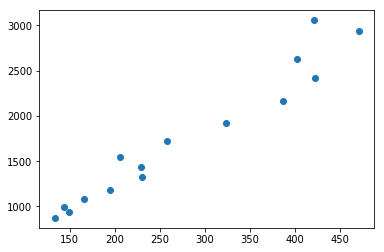

In [8]:
plt.scatter(data[["invest"]], data.gnp)
plt.show()

## Q2 
On définit deux nouvelles series correspondant à l'échelle logarithmique.


In [9]:
data["log_invest"] = data.invest.apply(m.log)
data["log_gnp"] = data.gnp.apply(m.log)

In [10]:
data.head()

,year,gnp,invest,cpi,interest,log_invest,log_gnp
0,1968,873.4,133.3,82.54,5.16,4.892602,6.772394
1,1969,944.0,149.3,86.79,5.87,5.005958,6.850126
2,1970,992.7,144.2,91.45,5.95,4.971201,6.900429
3,1971,1077.6,166.4,96.01,4.88,5.114395,6.982492
4,1972,1185.9,195.0,100.00,4.50,5.273000,7.078257


In [11]:
data.describe()

,year,gnp,invest,cpi,interest,log_invest,log_gnp
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1975.000000,1748.646667,276.006667,131.401333,7.452667,5.532761,7.383521
std,4.472136,738.145808,117.582691,40.286606,2.812245,0.437486,0.422801
min,1968.000000,873.400000,133.300000,82.540000,4.500000,4.892602,6.772394
25%,1971.500000,1131.750000,180.700000,98.005000,5.480000,5.193697,7.030374
50%,1975.000000,1549.200000,229.800000,125.790000,6.250000,5.437209,7.345494
75%,1978.500000,2290.850000,394.450000,156.920000,9.055000,5.977294,7.735140
max,1982.000000,3057.500000,471.500000,207.230000,13.420000,6.155919,8.025353


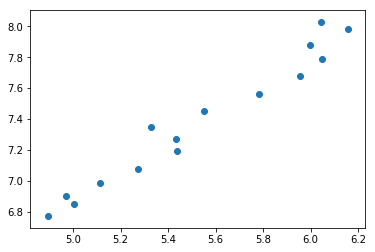

In [12]:
plt.scatter(data[["log_invest"]], data.log_gnp)
plt.show()

## Q3

In [13]:
n = len(data)

In [14]:
y = data.log_invest.values
x = data.log_gnp.values

In [15]:
beta1_chap = sum((x-x.mean())*(y-y.mean()))/sum((x-x.mean())**2)

In [16]:
beta0_chap = y.mean() - beta1_chap*x.mean()

In [25]:
print("L'intercept vaut {:.3f} et la pente est {:.3f}".format(beta0_chap, beta1_chap))

L'intercept vaut -1.964 et la pente est 1.015


In [14]:
sigma_chap_2 = (sum((y-(beta0_chap+beta1_chap*x))**2))/(n-2)

In [15]:
sigma_chap_2

0.0076763385554603995

In [16]:
var_beta0_chap = sigma_chap_2*(1/n+(x.mean()**2)/sum((x-x.mean())**2))

In [17]:
var_beta1_chap = sigma_chap_2/sum((x-x.mean())**2)

In [18]:
y_chap = beta0_chap + beta1_chap*x

In [19]:
R_2  = 1 - np.linalg.norm(y-y_chap)**2/np.linalg.norm(y-y.mean())**2

In [20]:
R_2

0.9627572956057855

In [21]:
T_stat_pente = beta1_chap/m.sqrt(var_beta1_chap)

In [22]:
T_stat_pente

18.331984456866678

Or d'après une table de la loi de student pour 95% le quantile vaut 1,771. La t-statistique ne n'apparient à IC, donc il est fortement probable que la pente soit significative.

In [23]:
x_pred = m.log(1000)

In [24]:
y_pred = beta0_chap + beta1_chap * x_pred

In [25]:
m.exp(y_pred)

155.97942793105494

In [26]:
borne_inf = y_pred - 1.350*m.sqrt(1/n+((x_pred-x.mean())**2)/sum((x-x.mean())**2))*m.sqrt(sigma_chap_2)

In [27]:
borne_sup = y_pred + 1.350*m.sqrt(1/n+((x_pred-x.mean())**2)/sum((x-x.mean())**2))*m.sqrt(sigma_chap_2)

In [28]:
borne_inf, borne_sup

(5.002841093530344, 5.09660715910326)

In [29]:
borne_inf2 = y_pred - 1.350*m.sqrt(1+1/n+((x_pred-x.mean())**2)/sum((x-x.mean())**2))*m.sqrt(sigma_chap_2)

In [30]:
borne_sup2 = y_pred + 1.350*m.sqrt(1+1/n+((x_pred-x.mean())**2)/sum((x-x.mean())**2))*m.sqrt(sigma_chap_2)

In [31]:
borne_inf2, borne_sup2

(4.922491481997104, 5.176956770636499)

In [32]:
y_pred

5.049724126316802

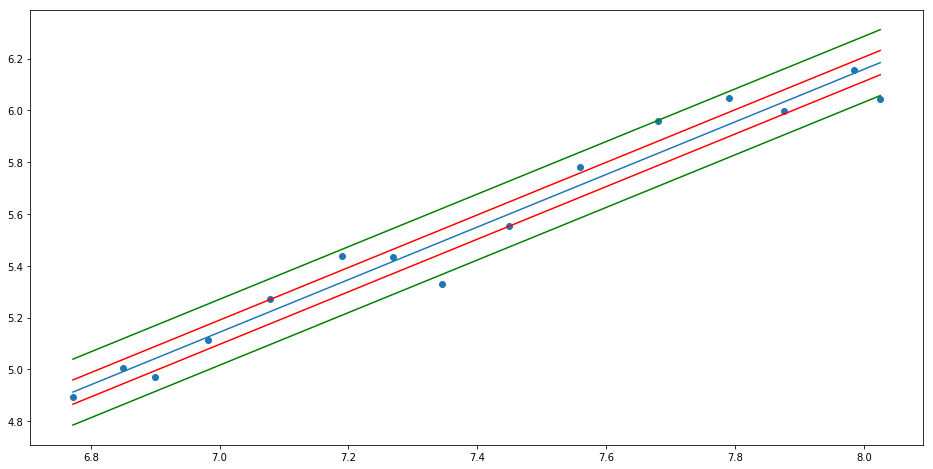

In [33]:
plt.figure(figsize=(16,8))
plt.scatter( data.log_gnp,data[["log_invest"]])
x_ = np.linspace(data.log_gnp.min(), data.log_gnp.max())
y_ = [beta0_chap+x*beta1_chap for x in x_]
y_sup = [y+1.350*m.sqrt(1/n+((x_pred-x.mean())**2)/sum((x-x.mean())**2))*m.sqrt(sigma_chap_2) for y in y_]
y_inf = [y-1.350*m.sqrt(1/n+((x_pred-x.mean())**2)/sum((x-x.mean())**2))*m.sqrt(sigma_chap_2) for y in y_]
y_sup_ = [y+1.350*m.sqrt(1+1/n+((x_pred-x.mean())**2)/sum((x-x.mean())**2))*m.sqrt(sigma_chap_2) for y in y_]
y_inf_ = [y-1.350*m.sqrt(1+1/n+((x_pred-x.mean())**2)/sum((x-x.mean())**2))*m.sqrt(sigma_chap_2) for y in y_]
plt.plot(x_,y_sup,c="r")
plt.plot(x_,y_inf,c="r")
plt.plot(x_,y_sup_,c="green")
plt.plot(x_,y_inf_,c="green")
plt.plot(x_,y_)
plt.show()

In [34]:
lin_model = lm.LinearRegression()

In [35]:
lin_model.fit(data[["log_gnp"]],data["log_invest"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
lin_model.coef_

array([1.0152814])

In [37]:
lin_model.intercept_

-1.9635913352301833

In [38]:
lin_model.predict([[x_pred]])

array([5.04972413])

In [39]:
y_pred

5.049724126316802

In [40]:
lin_model.score(data[["log_gnp"]],data["log_invest"])

0.9627572956057855

In [41]:
R_2

0.9627572956057855

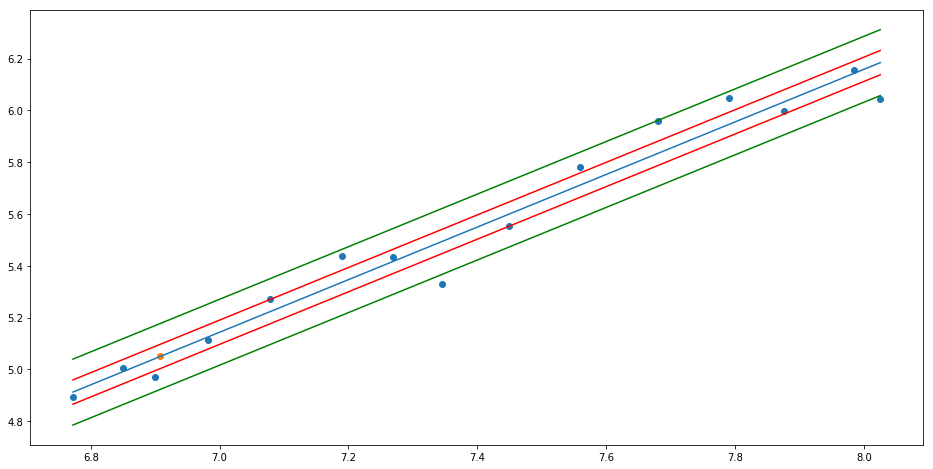

In [42]:
plt.figure(figsize=(16,8))
plt.scatter( data.log_gnp,data[["log_invest"]])
plt.scatter(x_pred,y_pred)
x_ = np.linspace(data.log_gnp.min(), data.log_gnp.max())
y_ = [beta0_chap+x*beta1_chap for x in x_]
y_sup = [y+1.350*m.sqrt(1/n+((x_pred-x.mean())**2)/sum((x-x.mean())**2))*m.sqrt(sigma_chap_2) for y in y_]
y_inf = [y-1.350*m.sqrt(1/n+((x_pred-x.mean())**2)/sum((x-x.mean())**2))*m.sqrt(sigma_chap_2) for y in y_]
y_sup_ = [y+1.350*m.sqrt(1+1/n+((x_pred-x.mean())**2)/sum((x-x.mean())**2))*m.sqrt(sigma_chap_2) for y in y_]
y_inf_ = [y-1.350*m.sqrt(1+1/n+((x_pred-x.mean())**2)/sum((x-x.mean())**2))*m.sqrt(sigma_chap_2) for y in y_]
plt.plot(x_,y_sup,c="r")
plt.plot(x_,y_inf,c="r")
plt.plot(x_,y_sup_,c="green")
plt.plot(x_,y_inf_,c="green")
plt.plot(x_,y_)
plt.show()

In [43]:
X = data[["log_gnp","interest"]].values

In [44]:
X = np.concatenate((np.ones_like(data.interest).reshape(-1,1),X), axis = 1)

In [45]:
gram_inv = np.linalg.inv(np.dot(X.T,X))

In [46]:
np.dot(gram_inv,np.dot(X.T,y))

array([-2.18045473,  1.05124269, -0.00652888])

In [57]:
cv = t.ppf(1.0 - 0.05, 13) # alpha = 0.05 , et degreef =15-2

pval= (1 - t.cdf(abs(T_stat_pente), 13)) * 2   # t_stat = c'est la formule dans le pol

In [58]:
pval

1.1363709973011282e-10

In [59]:
cv

1.7709333959867988